In [1]:
from collections.abc import Sequence
import json
from pathlib import Path
import re
from typing import Any

import h5py
import matplotlib.pyplot as plt
import nrrd
import numpy as np
from scipy.spatial.distance import euclidean
import vedo

from histalign.backend.ccf.paths import get_structure_mask_path
from histalign.backend.maths import compute_centre, compute_normal, compute_origin
from histalign.backend.models import (
    AlignmentSettings,
    Orientation,
    Resolution,
    VolumeSettings,
)
from histalign.backend.registration import Registrator
from histalign.backend.registration.alignment import (
    build_aligned_array,
    build_point_cloud,
)
from histalign.backend.workspace import VolumeSlicer

vedo.settings.default_backend = "vtk"

In [2]:
PathType = str | Path

ALIGNMENT_FILE_NAME_PATTERN = re.compile(r"[0-9a-f]{32}\.json")
_SUPPORTED_TYPES = [".h5", ".hdf5", ".nrrd", ".json", ".npy"]


def imshow(image: np.ndarray) -> None:
    plt.imshow(image)
    plt.axis(False)
    plt.show()


def show(objects: object | Sequence[object], axes: int = 3) -> None:
    try:
        objects = [] + objects
    except TypeError:
        objects = [objects]

    vedo.show(
        objects,
        axes=3,
        interactive=False,
    ).interactive().close()


def load_file(path: PathType) -> Any:
    path = Path(path)
    if (suffix := path.suffix) not in _SUPPORTED_TYPES:
        raise ValueError(
            f"File extension not supported. Received: {suffix}. Allowed: {' '.join(_SUPPORTED_TYPES)}"
        )

    if suffix == ".json":
        data = json.load(path.open())
    elif suffix == ".nrrd":
        data = nrrd.read(path)[0]
    elif suffix in [".h5", ".hdf5"]:
        with h5py.File(path) as handle:
            data = handle[list(handle.keys())[0]][:]
    elif suffix == ".npy":
        data = np.load(path)

    return data

In [13]:
atlas_path = "/home/ediun/.local/share/histalign/atlases/average_template_100.nrrd"
atlas_array = load_file(atlas_path)
atlas_volume = vedo.Volume(atlas_array > 100)

mask_path = get_structure_mask_path("root", Resolution.MICRONS_100)
mask_array = load_file(mask_path)
mask_volume = vedo.Volume(mask_array > 0)

In [4]:
hash_ = "8be574bb3c"  # Normal
# hash_ = "bb6ec0f5c8"  # Rotated

alignment_directory = Path(
    f"/home/ediun/histalign-projects/microns_100_coronal_3d_artificial/{hash_}"
)
build_aligned_array(alignment_directory, projection_regex="_max", force=True)

Using origin: [64.5 39.5 56.5]
Using origin: [65.5 39.5 56.5]
Using origin: [66.5 39.5 56.5]
Using origin: [67.5 39.5 56.5]
Using origin: [68.5 39.5 56.5]
Using origin: [ 4.5 39.5 56.5]
Using origin: [ 5.5 39.5 56.5]
Using origin: [ 6.5 39.5 56.5]
Using origin: [ 7.5 39.5 56.5]
Using origin: [ 8.5 39.5 56.5]
Using origin: [82.5 39.5 56.5]
Using origin: [83.5 39.5 56.5]
Using origin: [84.5 39.5 56.5]
Using origin: [85.5 39.5 56.5]
Using origin: [86.5 39.5 56.5]
Using origin: [40.5 39.5 56.5]
Using origin: [41.5 39.5 56.5]
Using origin: [42.5 39.5 56.5]
Using origin: [43.5 39.5 56.5]
Using origin: [44.5 39.5 56.5]
Using origin: [106.5  39.5  56.5]
Using origin: [107.5  39.5  56.5]
Using origin: [108.5  39.5  56.5]
Using origin: [109.5  39.5  56.5]
Using origin: [110.5  39.5  56.5]
Using origin: [22.5 39.5 56.5]
Using origin: [23.5 39.5 56.5]
Using origin: [24.5 39.5 56.5]
Using origin: [25.5 39.5 56.5]
Using origin: [26.5 39.5 56.5]
Using origin: [58.5 39.5 56.5]
Using origin: [59.5 39.5

In [5]:
path = Path("/mnt/c/Users/ediun/Downloads/997.obj")
volume = vedo.Mesh(str(path)).scale(1 / 100).c("lightgreen")

In [22]:
volume_path = Path(
    f"/home/ediun/histalign-projects/microns_100_coronal_3d_artificial/{hash_}/volumes/aligned/{hash_}.h5"
)
array = load_file(volume_path)

show(
    [
        mask_volume.alpha([(0, 0), (1, 1)]),
        # volume.alpha(1),
        vedo.Volume(array).alpha([(0, 0), (100, 1)]),
    ]
)

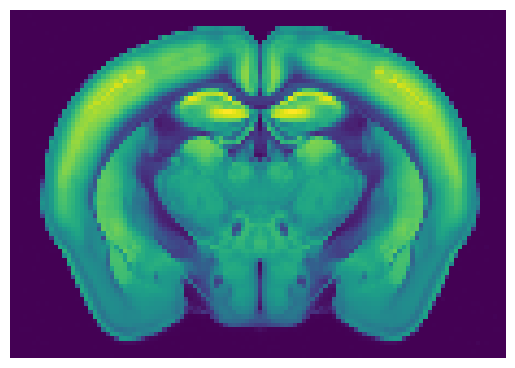

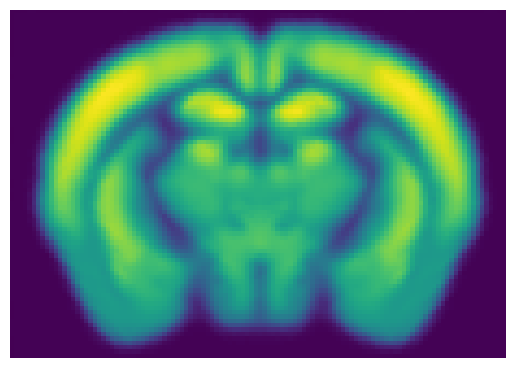

In [7]:
index = 65

imshow(atlas_array[index])
imshow(array[index])

In [8]:
# cloud = build_point_cloud(
#     (0, 0, 0),
#     (5, 5),
#     VolumeSettings(
#         orientation=Orientation.CORONAL,
#         resolution=Resolution.MICRONS_100,
#         shape=(5, 5, 5),
#     ),
# )
#
# show([cloud, vedo.Plane(normal=[1, 0, 0], s=(5, 5))])